In [1]:
!mkdir -p results results/dqn

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import gym
from gym.wrappers import Monitor

In [4]:
import base
from src.agents import DeepQAgent
from src.downsamplers import downsample_breakout

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [5]:
env = gym.make('Breakout-v4')
env = Monitor(env, './monitor/dqn/breakout-non-deterministic', force=True)

In [6]:
env.observation_space

Box(210, 160, 3)

In [7]:
env.action_space

Discrete(4)

# Agent

In [8]:
agent = DeepQAgent(env, downsample_breakout, 
    replay_memory_size=0,
    render_mode='rgb_array'
)
agent.model.load_weights('./models/dqn/breakout-nondeterministic.h5')
agent

DeepQAgent(
    env=<Monitor<TimeLimit<AtariEnv<Breakout-v4>>>>,
    downsample=Downsampler(y=(32, 14), x=(8, 8), cut=[142]),
    replay_memory_size=0,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.RMSprop object at 0x112c4ffd0>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x120bbf0d0>,
    image_size=(84, 84),
    render_mode='rgb_array'
)

In [9]:
fps = None # 60
scores = agent.play(games=100, fps=fps)
scores = pd.Series(scores)
scores

100%|██████████| 100/100 [10:42<00:00,  6.42s/game]


0     25.0
1     16.0
2     27.0
3     18.0
4     19.0
5     30.0
6     36.0
7     20.0
8     18.0
9     16.0
10    15.0
11    21.0
12    15.0
13    32.0
14    29.0
15    29.0
16    24.0
17    16.0
18    39.0
19    47.0
20    52.0
21    34.0
22    26.0
23    37.0
24    20.0
25    33.0
26    41.0
27    22.0
28    27.0
29    38.0
      ... 
70    24.0
71    18.0
72    42.0
73    33.0
74    26.0
75    26.0
76    22.0
77    16.0
78    34.0
79    43.0
80    39.0
81    15.0
82    35.0
83    17.0
84    34.0
85    31.0
86    36.0
87    26.0
88    19.0
89    28.0
90    34.0
91    18.0
92    26.0
93    31.0
94    38.0
95    30.0
96    38.0
97    26.0
98    21.0
99    35.0
Length: 100, dtype: float64

In [10]:
scores.to_csv('results/dqn/nondeterministic.csv')

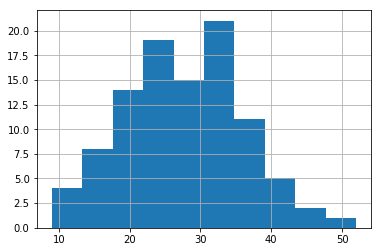

In [11]:
_ = scores.hist()

In [12]:
scores.describe()

count    100.000000
mean      27.890000
std        8.642034
min        9.000000
25%       21.000000
50%       28.500000
75%       33.250000
max       52.000000
dtype: float64